Homework 5 part 1

In [118]:
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from matplotlib import pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [119]:
iris = load_iris()

In [120]:
k_range = range(1,11)
wccs = []

for k in k_range:
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(iris.data)
  wccs.append(kmeans.inertia_)

In [121]:
wccs

[681.3705999999996,
 152.34795176035797,
 78.851441426146,
 57.22847321428572,
 46.44618205128204,
 39.066035353535376,
 34.427777417027414,
 30.064593073593088,
 28.136089787405595,
 26.162609291293514]

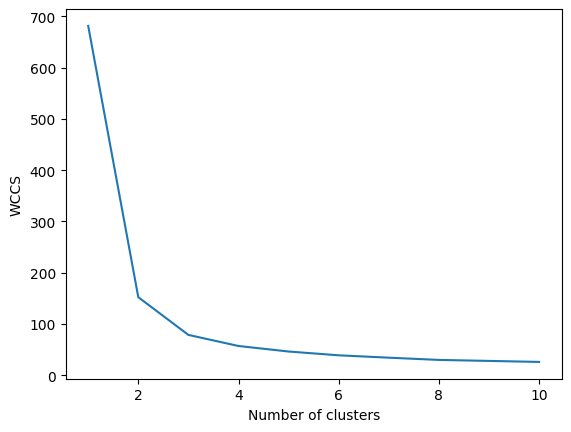

In [122]:
# 3 appears to be the optimal k value
plt.plot(k_range, wccs)
plt.xlabel('Number of clusters')
plt.ylabel('WCCS')
plt.show()

Homework 5 part 2

In [123]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import time

In [124]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

In [125]:
mnist.data.shape

(70000, 784)

In [126]:
mnist.target.shape

(70000,)

In [127]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, random_state=7)

In [128]:
std_scaler = StandardScaler()
X_train_scaled = std_scaler.fit_transform(X_train)
X_test_scaled = std_scaler.transform(X_test)

In [129]:
logisticRegr = LogisticRegression(solver='lbfgs', max_iter=1000)

In [130]:
# Time without PCA
start_time = time.time()
logisticRegr.fit(X_train_scaled, y_train)
time1 = time.time() - start_time
print(time1)

268.8193802833557


In [131]:
# Accuracy without PCA
y_pred = logisticRegr.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9165714285714286


In [132]:
pca = PCA(0.95, random_state=7)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [133]:
X_train_pca.shape

(52500, 327)

In [134]:
X_train.shape

(52500, 784)

In [135]:
# Time with PCA
start_time_pca = time.time()
logisticRegr.fit(X_train_pca, y_train)
time_pca = time.time() - start_time_pca
print(time_pca)

105.13886570930481


In [136]:
# Accuracy with PCA
y_pred_pca = logisticRegr.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test, y_pred_pca)
print(accuracy_pca)

0.9245142857142857


In [137]:
print(f' Time without PCA: {time1} seconds\n Accuracy without PCA: {accuracy}\n Time with PCA: {time_pca} seconds\n Accuracy with PCA: {accuracy_pca}')

 Time without PCA: 268.8193802833557 seconds
 Accuracy without PCA: 0.9165714285714286
 Time with PCA: 105.13886570930481 seconds
 Accuracy with PCA: 0.9245142857142857
